In [432]:
import pandas as pd

In [433]:
istanbul_neighbourhood = pd.read_csv('istanbul_neighbourhood.csv')

In [434]:
istanbul_neighbourhood.head()

,#NAME?,Neighbourhood,Latitude,Longitude
0,1,Adalar,40.876259,29.091027
1,2,Bagcilar,41.045061,28.833649
2,3,Bayrampasa,41.051248,28.898469
3,4,Beyoglu,41.028387,28.974045
4,5,Esenler,41.062002,28.869538


In [435]:
istanbul_neighbourhood.drop(['#NAME?'], axis=1, inplace = True)

In [436]:
istanbul_neighbourhood.head(10)

,Neighbourhood,Latitude,Longitude
0,Adalar,40.876259,29.091027
1,Bagcilar,41.045061,28.833649
2,Bayrampasa,41.051248,28.898469
3,Beyoglu,41.028387,28.974045
4,Esenler,41.062002,28.869538
5,Gaziosmanpasa,41.073421,28.901556
6,Kartal,40.915036,29.203717
7,Sancaktepe,40.999438,29.225250
8,Sisli,41.061672,28.984261
9,Umraniye,41.027219,29.127459


In [437]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [438]:
address = 'Istanbul, TR'

geolocator = Nominatim(user_agent="istanbul_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Istanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Istanbul are 41.0096334, 28.9651646.


In [439]:
# create map of Istanbul using latitude and longitude values
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=10)

In [440]:
map_istanbul

In [441]:
# add markers to map
for neighbourhood, lat, lng in zip(istanbul_neighbourhood['Neighbourhood'], istanbul_neighbourhood['Latitude'], istanbul_neighbourhood['Longitude']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul)  
    
map_istanbul

In [442]:
print('There are {} unique neighbourhoods.'.format(len(istanbul_neighbourhood['Neighbourhood'].unique())))

There are 39 unique neighbourhoods.


In [443]:
CLIENT_ID = '2GQBW5PR0QFXTOGCHKTRFWJBTGOFOHXW1TRTNRAFURQ5FE1X' # your Foursquare ID
CLIENT_SECRET = '3QH40WMZIIDSQN1RFAVAEQHUIMOQUJPKYPABQVNTSDQJN2YD' # your Foursquare Secret
VERSION = '20193109' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2GQBW5PR0QFXTOGCHKTRFWJBTGOFOHXW1TRTNRAFURQ5FE1X
CLIENT_SECRET:3QH40WMZIIDSQN1RFAVAEQHUIMOQUJPKYPABQVNTSDQJN2YD


In [444]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [445]:
LIMIT = 100

In [446]:

istanbul_venues = getNearbyVenues(names = istanbul_neighbourhood['Neighbourhood'],
                                   latitudes = istanbul_neighbourhood['Latitude'],
                                   longitudes = istanbul_neighbourhood['Longitude']
                                             )

Adalar
Bagcilar
Bayrampasa
Beyoglu
Esenler
Gaziosmanpasa
Kartal
Sancaktepe
Sisli
Umraniye
Arnavutkoy
Bahcelievler
Besiktas
Buyukcekmece
Esenyurt
Gungoren
Kucukcekmece
Sariyer
Sultanbeyli
Uskudar
Atasehir
Bakirkoy
Beykoz
Catalca
Eyup
Kadikoy
Maltepe
Sile
Sultangazi
Zeytinburnu
Avcilar
Basaksehir
Beylikduzu
Cekmekoy
Fatih
Kagithane
Pendik
Silivri
Tuzla


In [447]:
print(istanbul_venues.shape)
istanbul_venues.head(10)

(2024, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adalar,40.876259,29.091027,İnönü Evi Müzesi,40.878251,29.093647,History Museum
1,Adalar,40.876259,29.091027,Merit Halki Palace Hotel,40.878802,29.090974,Hotel
2,Adalar,40.876259,29.091027,L'isola Guesthouse,40.877038,29.096136,Bed & Breakfast
3,Adalar,40.876259,29.091027,Aqua Green Beach,40.880498,29.090354,Beach
4,Adalar,40.876259,29.091027,Huseyin Rahmi Gurpinar Muzesi,40.877224,29.092228,Museum
5,Adalar,40.876259,29.091027,Asaf Beach Club,40.879211,29.088317,Surf Spot
6,Adalar,40.876259,29.091027,heybeliada tenis kortu,40.878337,29.091221,Tennis Court
7,Adalar,40.876259,29.091027,heybeliada cicekli orman,40.878291,29.090232,Mountain
8,Adalar,40.876259,29.091027,Heybeliada Bisiklet Turu,40.878426,29.091641,Bike Rental / Bike Share
9,Adalar,40.876259,29.091027,Heybeliada Bayraktepe,40.874992,29.094010,Scenic Lookout


In [448]:
istanbul_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adalar,22,22,22,22,22,22
Arnavutkoy,75,75,75,75,75,75
Atasehir,38,38,38,38,38,38
Avcilar,100,100,100,100,100,100
Bagcilar,37,37,37,37,37,37
Bahcelievler,91,91,91,91,91,91
Bakirkoy,32,32,32,32,32,32
Basaksehir,10,10,10,10,10,10
Bayrampasa,41,41,41,41,41,41


In [449]:
print('There are {} unique categories.'.format(len(istanbul_venues['Venue Category'].unique())))

There are 260 unique categories.


In [450]:
# one hot encoding
istanbul_venues_onehot = pd.get_dummies(istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
istanbul_venues_onehot['Neighborhood'] = istanbul_venues['Neighborhood']

In [451]:
istanbul_venues_onehot = istanbul_venues_onehot[ ['Neighborhood'] + [ col for col in istanbul_venues_onehot.columns if col != 'Neighborhood' ] ]


In [452]:
istanbul_venues_onehot.head(30)

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Center,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Cigkofte Place,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Jewelry Store,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Kuruyemişçi,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Lounge,Manti Place,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Nudist Beach,Office,Optical Shop,Other Nightlife,Outdoor Event Space,Outlet Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilavcı,Pizza Place,Playground,Plaza,Pool,Pool Hall,Preschool,Pub,Public Art,Racetrack,Radio Station,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Roller Rink,Roof Deck,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tiki Bar,Track,Trail,Tram Station,Travel Agency,Tree,Turkish Home Cooking Restaurant,Turkish Restaurant,University,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Water Park,Waterfront,Wine Bar,Wings Joint,Women's Store,Çöp Şiş Place
0,Adalar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [453]:
istanbul_venues_onehot.shape

(2024, 261)

In [454]:
istanbul_venues_grouped = istanbul_venues_onehot.groupby('Neighborhood').mean().reset_index()
istanbul_venues_grouped.head(15)

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Center,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Cigkofte Place,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Jewelry Store,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Kuruyemişçi,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Lounge,Manti Place,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Nudist Beach,Office,Optical Shop,Other Nightlife,Outdoor Event Space,Outlet Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilavcı,Pizza Place,Playground,Plaza,Pool,Pool Hall,Preschool,Pub,Public Art,Racetrack,Radio Station,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Roller Rink,Roof Deck,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tiki Bar,Track,Trail,Tram Station,Travel Agency,Tree,Turkish Home Cooking Restaurant,Turkish Restaurant,University,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Water Park,Waterfront,Wine Bar,Wings Joint,Women's Store,Çöp Şiş Place
0,Adalar,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.045455,0.000000,0.000000,0.0,0.0,0.045455,0.0,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.136364,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.00

In [455]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [456]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
istanbul__venues__grouped_sorted = pd.DataFrame(columns=columns)
istanbul__venues__grouped_sorted['Neighborhood'] = istanbul_venues_grouped['Neighborhood']

for ind in np.arange(istanbul_venues_grouped.shape[0]):
    istanbul__venues__grouped_sorted.iloc[ind, 1:] = return_most_common_venues(istanbul_venues_grouped.iloc[ind, :], num_top_venues)

istanbul__venues__grouped_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Café,Scenic Lookout,Surf Spot,Beach,Historic Site,Bike Rental / Bike Share,Bed & Breakfast,Mountain,Museum,Pool
1,Arnavutkoy,Seafood Restaurant,Café,Restaurant,Lounge,Coffee Shop,Boat or Ferry,Music Venue,Cocktail Bar,Lighthouse,Pastry Shop
2,Atasehir,Café,Bistro,Restaurant,Coffee Shop,Gym Pool,Steakhouse,Doner Restaurant,Kebab Restaurant,Bakery,Tennis Court
3,Avcilar,Café,Gym / Fitness Center,Dessert Shop,Restaurant,Bar,Breakfast Spot,Coffee Shop,Turkish Restaurant,Boutique,Pub
4,Bagcilar,Café,Department Store,Wings Joint,Gym,Steakhouse,Turkish Restaurant,Accessories Store,Stationery Store,Tea Room,Fried Chicken Joint
5,Bahcelievler,Café,Dessert Shop,Turkish Restaurant,Restaurant,Bakery,Gym,Pide Place,Ice Cream Shop,Turkish Home Cooking Restaurant,Gaming Cafe
6,Bakirkoy,Café,Park,Athletics & Sports,Restaurant,Grocery Store,Boarding House,Pub,Shopping Mall,Coffee Shop,Forest
7,Basaksehir,Clothing Store,Turkish Restaurant,Café,Department Store,Soccer Stadium,Garden,Golf Course,Kebab Restaurant,Arts & Crafts Store,Pizza Place
8,Bayrampasa,Clothing Store,Café,Turkish Restaurant,Cosmetics Shop,Arcade,Gym / Fitness Center,Fast Food Restaurant,Pizza Place,Breakfast Spot,Food Court
9,Besiktas,Café,Music Venue,Gym,Bakery,Park,Pastry Shop,Steakhouse,Kebab Restaurant,Hookah Bar,Turkish Restaurant


In [457]:
# set number of clusters
#kclusters = 6

istanbul_venues_grouped_clustering = istanbul_venues_grouped.drop('Neighborhood', 1)

In [458]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(istanbul_venues_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

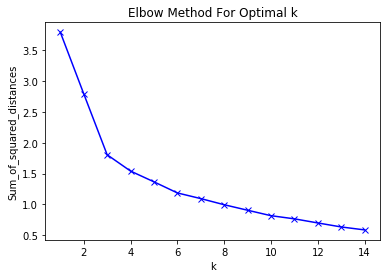

In [459]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [460]:


# run k-means clustering
kclusters = 6

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(istanbul_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40] 

array([0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 2, 0, 0, 0, 0, 3, 3, 4, 5, 3, 3, 3,
       3, 3, 0, 3, 3, 1, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3], dtype=int32)

In [461]:
istanbul__venues__grouped_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [462]:
istanbul_neighbourhood.rename({'Neighbourhood': 'Neighborhood'}, axis=1, inplace=True)


In [463]:
istanbul_neighbourhood.head()

,Neighborhood,Latitude,Longitude
0,Adalar,40.876259,29.091027
1,Bagcilar,41.045061,28.833649
2,Bayrampasa,41.051248,28.898469
3,Beyoglu,41.028387,28.974045
4,Esenler,41.062002,28.869538


In [464]:
istanbul_merged = istanbul_neighbourhood

# merge istanbul_grouped with istanbul_data to add latitude/longitude for each neighborhood
istanbul_merged = istanbul_merged.join(istanbul__venues__grouped_sorted.set_index('Neighborhood'), on='Neighborhood')

istanbul_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,40.876259,29.091027,0.0,Café,Scenic Lookout,Surf Spot,Beach,Historic Site,Bike Rental / Bike Share,Bed & Breakfast,Mountain,Museum,Pool
1,Bagcilar,41.045061,28.833649,3.0,Café,Department Store,Wings Joint,Gym,Steakhouse,Turkish Restaurant,Accessories Store,Stationery Store,Tea Room,Fried Chicken Joint
2,Bayrampasa,41.051248,28.898469,3.0,Clothing Store,Café,Turkish Restaurant,Cosmetics Shop,Arcade,Gym / Fitness Center,Fast Food Restaurant,Pizza Place,Breakfast Spot,Food Court
3,Beyoglu,41.028387,28.974045,0.0,Café,Coffee Shop,Hotel,Restaurant,Bar,Turkish Restaurant,Cocktail Bar,Art Gallery,Italian Restaurant,Plaza
4,Esenler,41.062002,28.869538,3.0,Electronics Store,Convenience Store,Café,Public Art,Food & Drink Shop,Shopping Mall,Burger Joint,Tailor Shop,Furniture / Home Store,Nudist Beach


In [465]:
istanbul_merged['Cluster Labels'].head() 

0    0.0
1    3.0
2    3.0
3    0.0
4    3.0
Name: Cluster Labels, dtype: float64

In [466]:
istanbul_merged = istanbul_merged.dropna(subset=['Cluster Labels'] )

In [467]:
istanbul_merged['Cluster Labels'] = istanbul_merged['Cluster Labels'].astype(int)

In [468]:
istanbul_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,40.876259,29.091027,0,Café,Scenic Lookout,Surf Spot,Beach,Historic Site,Bike Rental / Bike Share,Bed & Breakfast,Mountain,Museum,Pool
1,Bagcilar,41.045061,28.833649,3,Café,Department Store,Wings Joint,Gym,Steakhouse,Turkish Restaurant,Accessories Store,Stationery Store,Tea Room,Fried Chicken Joint
2,Bayrampasa,41.051248,28.898469,3,Clothing Store,Café,Turkish Restaurant,Cosmetics Shop,Arcade,Gym / Fitness Center,Fast Food Restaurant,Pizza Place,Breakfast Spot,Food Court
3,Beyoglu,41.028387,28.974045,0,Café,Coffee Shop,Hotel,Restaurant,Bar,Turkish Restaurant,Cocktail Bar,Art Gallery,Italian Restaurant,Plaza
4,Esenler,41.062002,28.869538,3,Electronics Store,Convenience Store,Café,Public Art,Food & Drink Shop,Shopping Mall,Burger Joint,Tailor Shop,Furniture / Home Store,Nudist Beach


In [469]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [470]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(istanbul_merged['Latitude'], istanbul_merged['Longitude'], istanbul_merged['Neighborhood'], istanbul_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## all toronto and istanbul neighborhoods together

In [471]:
istanbul_neighbourhood.head()

,Neighborhood,Latitude,Longitude
0,Adalar,40.876259,29.091027
1,Bagcilar,41.045061,28.833649
2,Bayrampasa,41.051248,28.898469
3,Beyoglu,41.028387,28.974045
4,Esenler,41.062002,28.869538


In [472]:
toronto_neighbourhood = pd.read_csv('toronto_neighbourhood.csv')

In [473]:
toronto_neighbourhood.head()

,Neighbourhood,Latitude,Longitude
0,Harbourfront,43.654260,-79.360636
1,Regent Park,43.654260,-79.360636
2,Ryerson,43.657162,-79.378937
3,Garden District,43.657162,-79.378937
4,St. James Town,43.651494,-79.375418


In [474]:
toronto_neighbourhood.shape

(74, 3)

In [475]:
toronto_neighbourhood.rename({'Neighbourhood': 'Neighborhood'}, axis=1, inplace=True)

In [476]:
frames_0 = [istanbul_neighbourhood,toronto_neighbourhood ]

In [477]:
istanbul_toronto_merged_neighborhoods = pd.concat(frames_0)

In [478]:
istanbul_toronto_merged_neighborhoods.reset_index(inplace = True, drop = True)

In [479]:
istanbul_toronto_merged_neighborhoods.head(45)

,Neighborhood,Latitude,Longitude
0,Adalar,40.876259,29.091027
1,Bagcilar,41.045061,28.833649
2,Bayrampasa,41.051248,28.898469
3,Beyoglu,41.028387,28.974045
4,Esenler,41.062002,28.869538
5,Gaziosmanpasa,41.073421,28.901556
6,Kartal,40.915036,29.203717
7,Sancaktepe,40.999438,29.225250
8,Sisli,41.061672,28.984261
9,Umraniye,41.027219,29.127459


In [480]:
istanbul_toronto_merged_neighborhoods.shape

(113, 3)

## top 10 toronto and istanbul venues together

In [481]:
istanbul_venues_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Center,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Cigkofte Place,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Jewelry Store,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Kuruyemişçi,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Lounge,Manti Place,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Nudist Beach,Office,Optical Shop,Other Nightlife,Outdoor Event Space,Outlet Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilavcı,Pizza Place,Playground,Plaza,Pool,Pool Hall,Preschool,Pub,Public Art,Racetrack,Radio Station,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Roller Rink,Roof Deck,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tiki Bar,Track,Trail,Tram Station,Travel Agency,Tree,Turkish Home Cooking Restaurant,Turkish Restaurant,University,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Water Park,Waterfront,Wine Bar,Wings Joint,Women's Store,Çöp Şiş Place
0,Adalar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.045455,0.0,0.000000,0.0,0.0,0.045455,0.0,0.000000,0.0,0.045455,0.00,0.00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.136364,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0

In [482]:
toronto_venues_grouped = pd.read_csv('toronto_venues_grouped.csv')

In [483]:
toronto_venues_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Adelaide,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03,0.0,0.0,0.010000,0.01,0.0,0.03,0.000000,0.000000,0.0,0.000000,0.020000,0.0,0.040000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.01,0.0,0.01,0.030000,0.000000,0.0,0.01,0.02,0.010000,0.0,0.000000,0.050000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.010000,0.000000,0.080000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.02,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.

In [484]:
frames_1 = [istanbul_venues_grouped,toronto_venues_grouped]

In [485]:
istanbul_toronto_venues_grouped = pd.concat(frames_1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [486]:
istanbul_toronto_venues_grouped.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Korean Restaurant,Kuruyemişçi,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Manti Place,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Outlet Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilavcı,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Preschool,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Roller Rink,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,San

In [487]:
istanbul_toronto_venues_grouped = istanbul_toronto_venues_grouped[ ['Neighborhood'] + [ col for col in istanbul_toronto_venues_grouped.columns if col != 'Neighborhood' ] ]


In [488]:
istanbul_toronto_venues_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Korean Restaurant,Kuruyemişçi,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Manti Place,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Outlet Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilavcı,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Preschool,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Roller Rink,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,San

In [489]:
istanbul_toronto_venues_grouped = istanbul_toronto_venues_grouped.fillna(0)

In [490]:
istanbul_toronto_venues_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Korean Restaurant,Kuruyemişçi,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Manti Place,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Outlet Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilavcı,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Preschool,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Roller Rink,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,San

In [491]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
istanbul_toronto_venues_grouped_sorted = pd.DataFrame(columns=columns)
istanbul_toronto_venues_grouped_sorted['Neighborhood'] = istanbul_toronto_venues_grouped['Neighborhood']

for ind in np.arange(istanbul_toronto_venues_grouped.shape[0]):
    istanbul_toronto_venues_grouped_sorted.iloc[ind, 1:] = return_most_common_venues(istanbul_toronto_venues_grouped.iloc[ind, :], num_top_venues)

istanbul_toronto_venues_grouped_sorted.head()



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Café,Scenic Lookout,Surf Spot,Beach,Bed & Breakfast,Museum,Tennis Court,Harbor / Marina,University,Bike Rental / Bike Share
1,Arnavutkoy,Seafood Restaurant,Café,Restaurant,Lounge,Cocktail Bar,Boat or Ferry,Lighthouse,Music Venue,Coffee Shop,Pastry Shop
2,Atasehir,Café,Bistro,Restaurant,Gym Pool,Doner Restaurant,Bakery,Coffee Shop,Steakhouse,Kebab Restaurant,Basketball Stadium
3,Avcilar,Café,Gym / Fitness Center,Dessert Shop,Breakfast Spot,Bar,Restaurant,Coffee Shop,Turkish Restaurant,Gym,Art Gallery
4,Bagcilar,Café,Department Store,Gym,Wings Joint,Turkish Restaurant,Steakhouse,BBQ Joint,Dessert Shop,Auto Garage,Stationery Store


In [492]:
istanbul_toronto_venues_grouped_sorted.reset_index(inplace = True, drop = True)

In [493]:
istanbul_toronto_venues_grouped_sorted.sort_values('Neighborhood').head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Café,Scenic Lookout,Surf Spot,Beach,Bed & Breakfast,Museum,Tennis Court,Harbor / Marina,University,Bike Rental / Bike Share
38,Adelaide,Coffee Shop,Café,Thai Restaurant,Steakhouse,Bar,Restaurant,Gym,Asian Restaurant,Breakfast Spot,American Restaurant
1,Arnavutkoy,Seafood Restaurant,Café,Restaurant,Lounge,Cocktail Bar,Boat or Ferry,Lighthouse,Music Venue,Coffee Shop,Pastry Shop
2,Atasehir,Café,Bistro,Restaurant,Gym Pool,Doner Restaurant,Bakery,Coffee Shop,Steakhouse,Kebab Restaurant,Basketball Stadium
3,Avcilar,Café,Gym / Fitness Center,Dessert Shop,Breakfast Spot,Bar,Restaurant,Coffee Shop,Turkish Restaurant,Gym,Art Gallery


In [494]:
istanbul_toronto_venues_grouped_sorted.shape

(111, 11)

In [495]:
istanbul_toronto_venues_grouped_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Café,Scenic Lookout,Surf Spot,Beach,Bed & Breakfast,Museum,Tennis Court,Harbor / Marina,University,Bike Rental / Bike Share
1,Arnavutkoy,Seafood Restaurant,Café,Restaurant,Lounge,Cocktail Bar,Boat or Ferry,Lighthouse,Music Venue,Coffee Shop,Pastry Shop
2,Atasehir,Café,Bistro,Restaurant,Gym Pool,Doner Restaurant,Bakery,Coffee Shop,Steakhouse,Kebab Restaurant,Basketball Stadium
3,Avcilar,Café,Gym / Fitness Center,Dessert Shop,Breakfast Spot,Bar,Restaurant,Coffee Shop,Turkish Restaurant,Gym,Art Gallery
4,Bagcilar,Café,Department Store,Gym,Wings Joint,Turkish Restaurant,Steakhouse,BBQ Joint,Dessert Shop,Auto Garage,Stationery Store


## clustering all toronto and istanbul venues together

In [496]:
# set number of clusters
#kclusters = 6

istanbul_toronto_venues_grouped_clustering = istanbul_toronto_venues_grouped.drop('Neighborhood', 1)

In [497]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(istanbul_toronto_venues_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

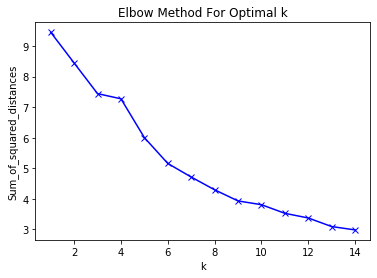

In [498]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [499]:
# run k-means clustering

kclusters = 6
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(istanbul_toronto_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 5, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int32)

In [500]:
# add clustering labels
istanbul_toronto_venues_grouped_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [501]:
all_merged = istanbul_toronto_merged_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
all_merged = all_merged.join(istanbul_toronto_venues_grouped_sorted.set_index('Neighborhood'), on='Neighborhood')

all_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,40.876259,29.091027,1.0,Café,Scenic Lookout,Surf Spot,Beach,Bed & Breakfast,Museum,Tennis Court,Harbor / Marina,University,Bike Rental / Bike Share
1,Bagcilar,41.045061,28.833649,1.0,Café,Department Store,Gym,Wings Joint,Turkish Restaurant,Steakhouse,BBQ Joint,Dessert Shop,Auto Garage,Stationery Store
2,Bayrampasa,41.051248,28.898469,1.0,Clothing Store,Café,Turkish Restaurant,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Arcade,Hotel,Rental Car Location,Soccer Field
3,Beyoglu,41.028387,28.974045,1.0,Café,Restaurant,Coffee Shop,Hotel,Bar,Turkish Restaurant,Cocktail Bar,Art Gallery,Italian Restaurant,Lounge
4,Esenler,41.062002,28.869538,2.0,Convenience Store,Electronics Store,Café,Gym / Fitness Center,Nudist Beach,Furniture / Home Store,Tailor Shop,Dessert Shop,Shopping Mall,Burger Joint


In [502]:
all_merged.sort_values('Neighborhood').head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,40.876259,29.091027,1.0,Café,Scenic Lookout,Surf Spot,Beach,Bed & Breakfast,Museum,Tennis Court,Harbor / Marina,University,Bike Rental / Bike Share
48,Adelaide,43.650571,-79.384568,2.0,Coffee Shop,Café,Thai Restaurant,Steakhouse,Bar,Restaurant,Gym,Asian Restaurant,Breakfast Spot,American Restaurant
10,Arnavutkoy,41.068394,29.041154,1.0,Seafood Restaurant,Café,Restaurant,Lounge,Cocktail Bar,Boat or Ferry,Lighthouse,Music Venue,Coffee Shop,Pastry Shop
20,Atasehir,40.984749,29.106720,1.0,Café,Bistro,Restaurant,Gym Pool,Doner Restaurant,Bakery,Coffee Shop,Steakhouse,Kebab Restaurant,Basketball Stadium
30,Avcilar,40.980135,28.717547,1.0,Café,Gym / Fitness Center,Dessert Shop,Breakfast Spot,Bar,Restaurant,Coffee Shop,Turkish Restaurant,Gym,Art Gallery


In [503]:
all_merged.shape

(113, 14)

In [504]:
istanbul_toronto_merged_neighborhoods.shape

(113, 3)

In [505]:
all_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,40.876259,29.091027,1.0,Café,Scenic Lookout,Surf Spot,Beach,Bed & Breakfast,Museum,Tennis Court,Harbor / Marina,University,Bike Rental / Bike Share
1,Bagcilar,41.045061,28.833649,1.0,Café,Department Store,Gym,Wings Joint,Turkish Restaurant,Steakhouse,BBQ Joint,Dessert Shop,Auto Garage,Stationery Store
2,Bayrampasa,41.051248,28.898469,1.0,Clothing Store,Café,Turkish Restaurant,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Arcade,Hotel,Rental Car Location,Soccer Field
3,Beyoglu,41.028387,28.974045,1.0,Café,Restaurant,Coffee Shop,Hotel,Bar,Turkish Restaurant,Cocktail Bar,Art Gallery,Italian Restaurant,Lounge
4,Esenler,41.062002,28.869538,2.0,Convenience Store,Electronics Store,Café,Gym / Fitness Center,Nudist Beach,Furniture / Home Store,Tailor Shop,Dessert Shop,Shopping Mall,Burger Joint


In [506]:
all_merged = all_merged.dropna(subset=['Cluster Labels'])

In [507]:

all_merged['Cluster Labels'] = all_merged['Cluster Labels'].astype(int)


## mapping toronto and istanbul together

In [508]:
latitude = 41.0096334
longtitude = 28.9651646

In [509]:
istanbul_toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [510]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(istanbul_toronto_map_clusters)
       
istanbul_toronto_map_clusters

In [511]:
toronto_latitude = 43.6913544
toronto_longtitude = -79.5006666  

istanbul_toronto_map_clusters = folium.Map(location=[toronto_latitude, toronto_longtitude], zoom_start=11)

In [512]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(istanbul_toronto_map_clusters)
       
istanbul_toronto_map_clusters

<h1><center>Hierarchical Clustering</center></h1>

In [513]:
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 

In [514]:
#Normalization


from sklearn.preprocessing import MinMaxScaler

x = istanbul_toronto_venues_grouped_clustering.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [515]:
# Clustering using Scipy

import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [516]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [517]:
from scipy.cluster.hierarchy import fcluster
max_d = 12
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 5, 3, 5, 3, 3, 5, 5, 3, 3, 6, 5, 3, 3, 3, 5, 3, 5, 5, 3, 5, 5,
       3, 3, 3, 3, 5, 6, 5, 5, 5, 3, 5, 3, 5, 3, 5, 3, 2, 4, 3, 5, 3, 4,
       3, 3, 1, 5, 3, 5, 5, 5, 6, 5, 5, 5, 5, 2, 6, 6, 6, 3, 1, 3, 5, 5,
       4, 3, 5, 4, 1, 2, 4, 6, 3, 6, 5, 3, 5, 5, 4, 6, 5, 2, 5, 5, 6, 6,
       3, 3, 6, 4, 5, 3, 5, 6, 6, 3, 5, 6, 5, 5, 3, 5, 5, 3, 2, 5, 3, 5,
       5], dtype=int32)

In [518]:
istanbul_toronto_venues_grouped_sorted.insert(0, 'Cluster Labels H', clusters)

In [529]:
all_merged = istanbul_toronto_merged_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
all_merged = all_merged.join(istanbul_toronto_venues_grouped_sorted.set_index('Neighborhood'), on='Neighborhood')

all_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels H,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,40.876259,29.091027,3.0,1.0,Café,Scenic Lookout,Surf Spot,Beach,Bed & Breakfast,Museum,Tennis Court,Harbor / Marina,University,Bike Rental / Bike Share
1,Bagcilar,41.045061,28.833649,3.0,1.0,Café,Department Store,Gym,Wings Joint,Turkish Restaurant,Steakhouse,BBQ Joint,Dessert Shop,Auto Garage,Stationery Store
2,Bayrampasa,41.051248,28.898469,3.0,1.0,Clothing Store,Café,Turkish Restaurant,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Arcade,Hotel,Rental Car Location,Soccer Field
3,Beyoglu,41.028387,28.974045,3.0,1.0,Café,Restaurant,Coffee Shop,Hotel,Bar,Turkish Restaurant,Cocktail Bar,Art Gallery,Italian Restaurant,Lounge
4,Esenler,41.062002,28.869538,3.0,2.0,Convenience Store,Electronics Store,Café,Gym / Fitness Center,Nudist Beach,Furniture / Home Store,Tailor Shop,Dessert Shop,Shopping Mall,Burger Joint


In [520]:
all_merged = all_merged.dropna(subset=['Cluster Labels H'])

In [521]:
all_merged['Cluster Labels H'] = all_merged['Cluster Labels H'].astype(int)


In [522]:
latitude = 41.0096334
longtitude = 28.9651646

In [523]:
istanbul_toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [524]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels H']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(istanbul_toronto_map_clusters)
       
istanbul_toronto_map_clusters

In [525]:
toronto_latitude = 43.6913544
toronto_longtitude = -79.5006666  

istanbul_toronto_map_clusters = folium.Map(location=[toronto_latitude, toronto_longtitude], zoom_start=11)

In [526]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels H']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(istanbul_toronto_map_clusters)
       
istanbul_toronto_map_clusters